In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, BayesianRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# get the default color cycle from matplotlib
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
def get_color(i):
    return color_cycle[i % len(color_cycle)]

# $\star$ Question 1:

## 1.1 Load and plot data

Load the points from `regression.npz`.

The data contains $N$ datapoints and 2 columns with column 0 as x-axis (inputs $\mathbf{x}$) and feature 1 as y-axis (targets $\mathbf{t}$). Scatterplot the data.

In [3]:
file = np.load("../data/regression.npz")
file.files

['arr_0']

In [4]:
# Load the data and check shape
data = file['arr_0']
data.shape

(20, 2)

In [5]:
# Inspect the first couple of columns
data[:5, :]

array([[0.8 , 0.12],
       [0.85, 0.14],
       [0.15, 0.45],
       [0.9 , 0.31],
       [0.98, 0.28]])

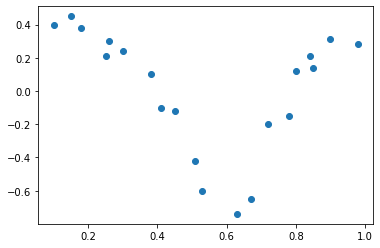

In [6]:
# Since no info is given assume that the first column are the feature samples and the second
# column are the targets
# Plot the points
plt.scatter(data[:, 0], data[:, 1])

## 1.2 Implement Linear Regression with polynomials

Now the goal is to estimate the weight parameters using $m^{\textrm{th}}$ order polynomials as basis functions using the ML Estimator.

Implement function `get_poly_features` - Get the polynomial features given inputs $\mathbf{x}$ and polynomial degree $m$. Compute the $M = m + 1$ basis functions with $\phi_m(x_n) = x_n ^ m $ for $m = \{0, ..., M\}$ and $n = \{0, ..., N-1\}$. Return a matrix $\Phi$ of shape $(N, M+1)$.

Implement a predictor class with the following functions:

1. `fit` - Estimate and save the weight parameters using the ML estimator. Hint: `np.linalg.inv` can inverse matrices.
1. `predict` - Predict targets given inputs.

Then:

1. Create the predictor, fit the given data.
1. Predict the targets for the given $\mathbf{x}$, print the mean squared error (MSE) and scatterplot the predictions.
1. Predict the targets for a suitable range of inputs and plot them to view the whole polynomial.

See how the outcome changes as you change $m$.

Example output:

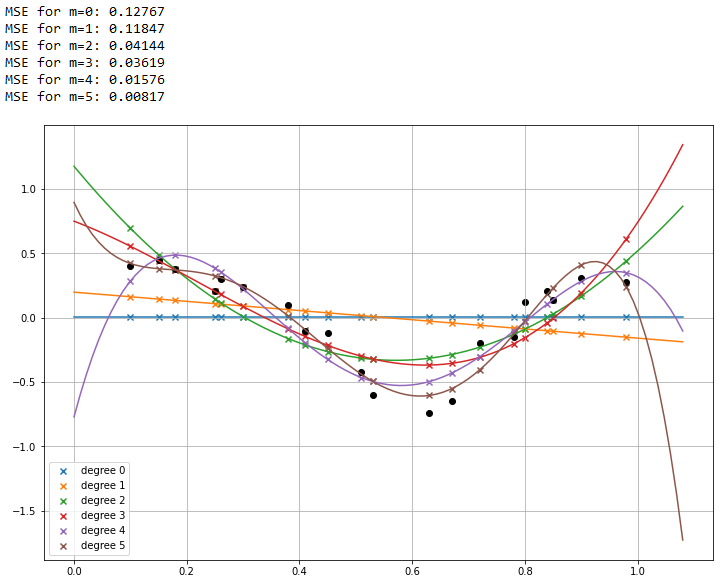

In [8]:
# Get the dimensions
n_points = data.shape[0]
n_features = 1

# Get the features
features = data[:, 0]

# Get the targets
target = data[:, 1]

# Create the basis function matrix 
first_col = np.ones((n_points))
second_col = features
third_col = features ** 2
forth_col = features ** 3

# Stack the arrays along the columns dimension
phi_second = np.stack((first_col, second_col, third_col), axis=1)
phi_third = np.stack((first_col, second_col, third_col, forth_col), axis=1)


# Calculate the weights
w_ml_second = np.linalg.pinv(phi_second) @ target
w_ml_third = np.linalg.pinv(phi_third) @ target

# Reshape weights and features for convenient numpy operations
w_ml_second = w_ml_second.reshape(-1, 1)
w_ml_third = w_ml_third.reshape(-1, 1)
features = features.reshape(-1, 1)

# Print the weights
w_ml_second, w_ml_third

(array([[ 1.17789808],
        [-5.28356955],
        [ 4.62568993]]),
 array([[ 0.75099085],
        [-1.67182518],
        [-3.27712066],
        [ 4.93983806]]))

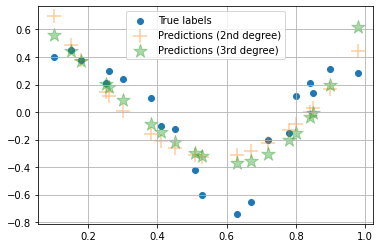

In [9]:
# Create the predictions
preds_second = phi_second @ w_ml_second
preds_third = phi_third @ w_ml_third

plt.scatter(features, target, label="True labels")
plt.scatter(features, preds_second, label="Predictions (2nd degree)", marker="+", s=200, alpha=0.4)
plt.scatter(features, preds_third, label="Predictions (3rd degree)", marker="*", s=200, alpha=0.4)
plt.legend()
plt.grid()

# $\star$ $\star$ Question 2:

## 2.1 Ridge Regression using sklearn

Estimate the weights using the MAP estimator with the Gaussian prior
from this class (Ridge Regression). Use class `Ridge` from sklearn as the predictor.

Note the difference between Regularized Least Squares [1] used by sklearn's `Ridge` class with parameter $\lambda$ and Bayesian Linear Regression with a zero-mean isotropic Gaussian prior [2] as used in the slides with parameters $\alpha$ and $\beta$. The resulting weights and the mean predictions are equivalent for $\lambda = \alpha\ /\ \beta$. Parameter $\beta$ is a prior for the precision of the prediction.

Create the function `reg_ridge_sci` with parameters `x, y, t, alpha=0.001, beta=10` and create the predictor with `lambda = alpha / beta` and `Ridge(alpha=lambd, solver="svd", fit_intercept=False)`. We can set `fit_intercept=False` since the polynomial with degree 0 will act as the intercept.

To use this predictor, **either** reuse the function `get_poly_features` from above to create the polynomial input features for the Ridge model **or** create a pipeline: `make_pipeline(PolynomialFeatures(degree=m), Ridge(...))`. Note that in the second case you will need to expand the inputs `expa_x = x[:, None]` since sklearn expects inputs of shape `(n_datapoints, d_features)` even if `d_features == 1`.

- Print the MSE.
- Plot the true labels and the predictions. 
- Create a suitable input range and predict its targets to plot the polynomial line.
- **Bonus**: Compute the standard deviation for a plot in the style of slide 15. Compute the inverse posterior covariance $S_N$ given the data (slide 11). Now, compute the prediction variance for the input range (eqn. 3, slide 14). This can be tricky in numpy. Given matrices `A` and `B` both of shape `(N, D)`, to get the `N` dot products you can use `np.einsum("nd,nd->n", A, B)`. Alternatively, use slow for-loops. Compute standard deviation as square root of variance. Use `plt.fill_between` and set the transparency `alpha=0.2` to plot the standard deviation. Use `plt.ylim` to constrain the plot within `np.min(t) - 1, np.max(t) + 1`.

See what happens as you use fewer and fewer points to estimate the weights.

Also see what happens as you change the hyperparameters $\alpha$, $\beta$ and the order of the
polynomial $m$. When must it be large, when can it be chosen smaller?

- [1] Christopher M. Bishop, Pattern Recognition and Machine Learning, p. 144, eqn. 3.27
- [2] Christopher M. Bishop, Pattern Recognition and Machine Learning, p. 153, eqn. 3.55

Example output when using less datapoints:

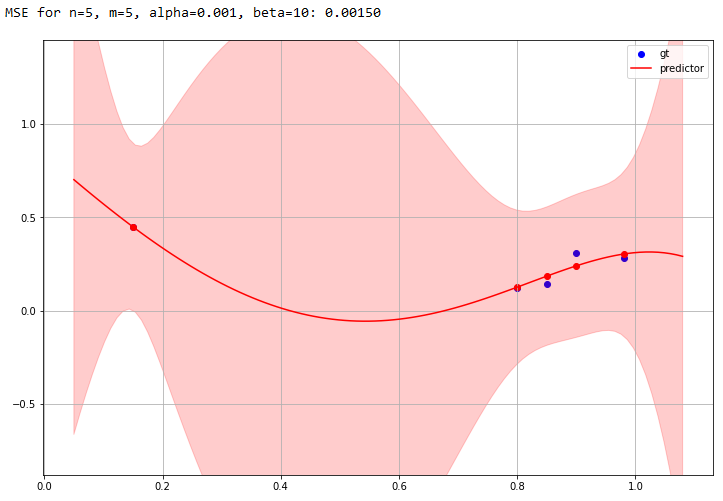

## 2.2 Manual Ridge Regression

Create the class `PolyRidgeRegression` to replace sklearn's `Ridge`, see slide 11 for the formulae.

Create a plot as in 2.2 and verify that the results match.

# $\star \star \star$ Question 3:
Find the optimum hyperparameters using the evidence approximation. 
It is not that hard. You know EM and you know how to
estimate the weight parameters. Just combine these two. 

See slide 24 and Bishop 3.5.1 pages 166-169, especially eqn. 3.95.

Start the optimization with $\alpha_0=0.001, \beta_0=10$.
Create two plots using function `reg_ridge_sci` from question 2, one with the old hyperparameters and one with the optimized hyperparameters. The MSE should be lower in the second case because you have found better hyper-parameters.

Verify your results by fitting a `BayesianRidge` predictor from sklearn. The parameters are named differently: Create it as `BayesianRidge(lambda_init=alpha0, alpha_init=beta0, fit_intercept=False, verbose=True)`, fit and extract the results as `alpha = br.lambda_` and `beta = br.alpha_`. You should receive the same hyperparameters as in your own evidence approximation.